In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf

from tensorflow import keras

In [2]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
# print(housing.DESCR)
print(housing.data.shape)
print(housing.target.shape)

(20640, 8)
(20640,)


In [3]:
from sklearn.model_selection import train_test_split

x_train_all, x_test, y_train_all, y_test = train_test_split(housing.data, housing.target, random_state=7)
x_train, x_valid, y_train, y_valid = train_test_split(x_train_all, y_train_all, random_state=11)

print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)
print(x_test.shape, y_test.shape)

(11610, 8) (11610,)
(3870, 8) (3870,)
(5160, 8) (5160,)


In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_valid_scaled = scaler.transform(x_valid)
x_test_scaled = scaler.transform(x_test)

In [5]:
# 多输出
input_wide = keras.layers.Input(shape=[5])
input_deep = keras.layers.Input(shape=[6])
hidden1 = keras.layers.Dense(30, activation="relu")(input_deep)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_wide, hidden2])
output =  keras.layers.Dense(1)(concat)
output2 = keras.layers.Dense(1)(hidden2)

model = keras.models.Model(inputs=[input_wide, input_deep], outputs=[output, output2])

model.summary()
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(0.001))
callbacks = [keras.callbacks.EarlyStopping(patience=5, min_delta=1e-2)]

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 6)]          0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 30)           210         input_2[0][0]                    
__________________________________________________________________________________________________
input_1 (InputLayer)            [(None, 5)]          0                                            
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 30)           930         dense[0][0]                      
_______________________________________________________________________________________

In [6]:
x_train_scaled_wide = x_train_scaled[:, :5]
x_train_scaled_deep = x_train_scaled[:, 2:]
x_valid_scaled_wide = x_valid_scaled[:, :5]
x_valid_scaled_deep = x_valid_scaled[:, 2:]
x_test_scaled_wide = x_test_scaled[:, :5]
x_test_scaled_deep = x_test_scaled[:, 2:]

history = model.fit([x_train_scaled_wide, x_train_scaled_deep], [y_train, y_train],
                   validation_data=([x_valid_scaled_wide, x_valid_scaled_deep], [y_valid, y_valid]),
                   epochs=100,
                   callbacks=callbacks)

Epoch 1/100
363/363 [==============================] - 0s 912us/step - loss: 4.4796 - dense_2_loss: 2.0173 - dense_3_loss: 2.4623 - val_loss: 2.2218 - val_dense_2_loss: 0.9512 - val_dense_3_loss: 1.2706
Epoch 2/100
363/363 [==============================] - 0s 549us/step - loss: 1.8176 - dense_2_loss: 0.7518 - dense_3_loss: 1.0658 - val_loss: 1.7462 - val_dense_2_loss: 0.7123 - val_dense_3_loss: 1.0340
Epoch 3/100
363/363 [==============================] - 0s 561us/step - loss: 1.5337 - dense_2_loss: 0.6267 - dense_3_loss: 0.9070 - val_loss: 1.5606 - val_dense_2_loss: 0.6465 - val_dense_3_loss: 0.9141
Epoch 4/100
363/363 [==============================] - 0s 562us/step - loss: 1.3982 - dense_2_loss: 0.5809 - dense_3_loss: 0.8173 - val_loss: 1.4415 - val_dense_2_loss: 0.6061 - val_dense_3_loss: 0.8355
Epoch 5/100
363/363 [==============================] - 0s 545us/step - loss: 1.3130 - dense_2_loss: 0.5514 - dense_3_loss: 0.7616 - val_loss: 1.3674 - val_dense_2_loss: 0.5801 - val_dense_

363/363 [==============================] - 0s 560us/step - loss: 0.8284 - dense_2_loss: 0.3658 - dense_3_loss: 0.4625 - val_loss: 0.8781 - val_dense_2_loss: 0.3913 - val_dense_3_loss: 0.4868
Epoch 42/100
363/363 [==============================] - 0s 549us/step - loss: 0.8270 - dense_2_loss: 0.3657 - dense_3_loss: 0.4613 - val_loss: 0.8716 - val_dense_2_loss: 0.3859 - val_dense_3_loss: 0.4857
Epoch 43/100
363/363 [==============================] - 0s 542us/step - loss: 0.8248 - dense_2_loss: 0.3660 - dense_3_loss: 0.4588 - val_loss: 0.8701 - val_dense_2_loss: 0.3870 - val_dense_3_loss: 0.4831
Epoch 44/100
363/363 [==============================] - 0s 544us/step - loss: 0.8173 - dense_2_loss: 0.3625 - dense_3_loss: 0.4548 - val_loss: 0.8733 - val_dense_2_loss: 0.3926 - val_dense_3_loss: 0.4807
Epoch 45/100
363/363 [==============================] - 0s 549us/step - loss: 0.8180 - dense_2_loss: 0.3638 - dense_3_loss: 0.4541 - val_loss: 0.8593 - val_dense_2_loss: 0.3858 - val_dense_3_loss: 

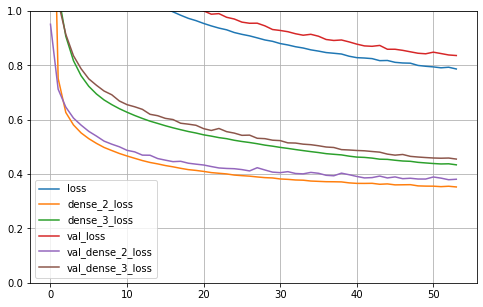

In [7]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()

plot_learning_curves(history)

In [8]:
model.evaluate([x_test_scaled_wide, x_test_scaled_deep], [y_test, y_test])

162/162 [==============================] - 0s 369us/step - loss: 0.8262 - dense_2_loss: 0.3740 - dense_3_loss: 0.4522


[0.8262196779251099, 0.3739728033542633, 0.45224708318710327]